# Prevendo se um cliente irá abandonar a empresa ou não

* Importando bibliotecas para manipulação e visualização dos dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Fazendo leitura dos dados

In [2]:
dados = pd.read_csv('Telco.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exibindo informações dos dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Convertendo TotalCharges para float

In [5]:
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

* Procurando por NaNs

In [6]:
dados.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Removendo NaNs

In [7]:
dados = dados.dropna()

In [8]:
dados.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Coluna customerID pode ser removida

In [9]:
dados = dados.drop('customerID',axis=1)

In [10]:
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Visualizando dados em função do churn (desistência)

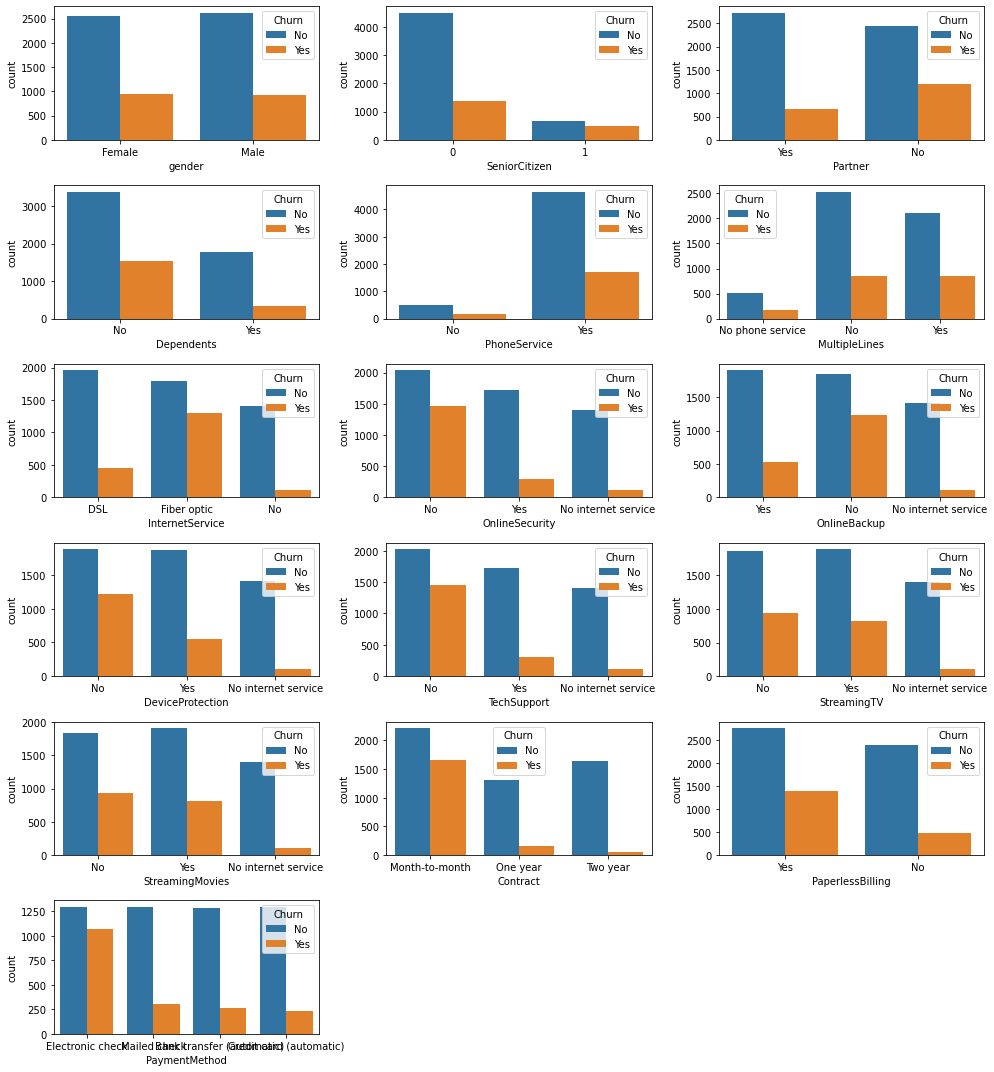

In [11]:
linhas = 6
colunas = 3

plt.figure(figsize=(14,15))
plt.subplot(linhas,colunas,1)
sns.countplot(data=dados, x='gender',hue='Churn');
plt.subplot(linhas,colunas,2)
sns.countplot(data=dados, x='SeniorCitizen',hue='Churn');
plt.subplot(linhas,colunas,3)
sns.countplot(data=dados, x='Partner',hue='Churn');
plt.subplot(linhas,colunas,4)
sns.countplot(data=dados, x='Dependents',hue='Churn');
plt.subplot(linhas,colunas,5)
sns.countplot(data=dados, x='PhoneService',hue='Churn');
plt.subplot(linhas,colunas,6)
sns.countplot(data=dados, x='MultipleLines',hue='Churn');
plt.subplot(linhas,colunas,7)
sns.countplot(data=dados, x='InternetService',hue='Churn');
plt.subplot(linhas,colunas,8)
sns.countplot(data=dados, x='OnlineSecurity',hue='Churn');
plt.subplot(linhas,colunas,9)
sns.countplot(data=dados, x='OnlineBackup',hue='Churn');
plt.subplot(linhas,colunas,10)
sns.countplot(data=dados, x='DeviceProtection',hue='Churn');
plt.subplot(linhas,colunas,11)
sns.countplot(data=dados, x='TechSupport',hue='Churn');
plt.subplot(linhas,colunas,12)
sns.countplot(data=dados, x='StreamingTV',hue='Churn');
plt.subplot(linhas,colunas,13)
sns.countplot(data=dados, x='StreamingMovies',hue='Churn');
plt.subplot(linhas,colunas,14)
sns.countplot(data=dados, x='Contract',hue='Churn');
plt.subplot(linhas,colunas,15)
sns.countplot(data=dados, x='PaperlessBilling',hue='Churn');
plt.subplot(linhas,colunas,16)
sns.countplot(data=dados, x='PaymentMethod',hue='Churn');
plt.tight_layout()

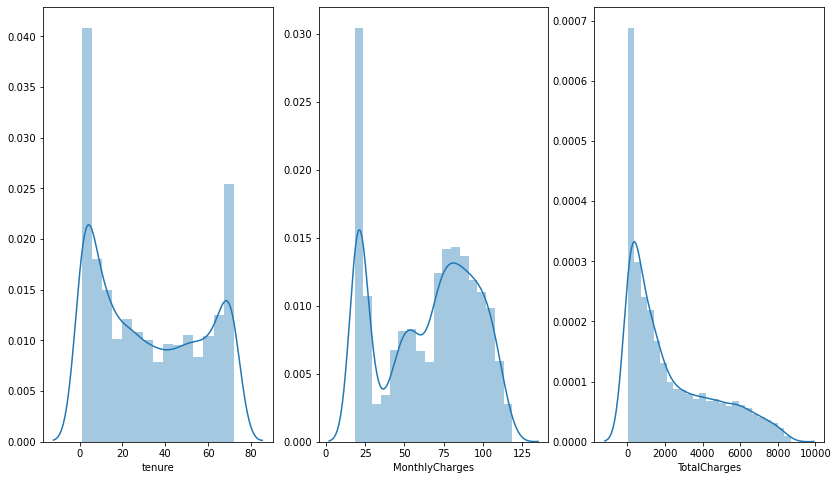

In [12]:
linhas = 1
colunas = 3

plt.figure(figsize=(14,8))
plt.subplot(linhas,colunas,1)
sns.distplot(dados['tenure'])

plt.subplot(linhas,colunas,2)
sns.distplot(dados['MonthlyCharges'])

plt.subplot(linhas,colunas,3)
sns.distplot(dados['TotalCharges'])

* Normalizando dados

In [13]:
colunas = ['tenure','MonthlyCharges','TotalCharges']

In [14]:
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer

In [15]:
for col in colunas:
    scaler = MinMaxScaler()
    dados[col] = scaler.fit_transform(dados[col].values.reshape(-1, 1))

In [16]:
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [17]:
mlb = MultiLabelBinarizer()

dados['gender'] = mlb.fit_transform(dados['gender'])
dados['Partner'] = mlb.fit_transform(dados['Partner'])
dados['Dependents'] = mlb.fit_transform(dados['Dependents'])
dados['PhoneService'] = mlb.fit_transform(dados['PhoneService'])
dados['MultipleLines'] = mlb.fit_transform(dados['MultipleLines'])
dados['InternetService'] = mlb.fit_transform(dados['InternetService'])
dados['OnlineSecurity'] = mlb.fit_transform(dados['OnlineSecurity'])
dados['OnlineBackup'] = mlb.fit_transform(dados['OnlineBackup'])
dados['DeviceProtection'] = mlb.fit_transform(dados['DeviceProtection'])
dados['TechSupport'] = mlb.fit_transform(dados['TechSupport'])
dados['StreamingTV'] = mlb.fit_transform(dados['StreamingTV'])
dados['StreamingMovies'] = mlb.fit_transform(dados['StreamingMovies'])
dados['Contract'] = mlb.fit_transform(dados['Contract'])
dados['PaperlessBilling'] = mlb.fit_transform(dados['PaperlessBilling'])
dados['PaymentMethod'] = mlb.fit_transform(dados['PaymentMethod'])
dados['Churn'] = mlb.fit_transform(dados['Churn'])

In [18]:
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0.000000,1,1,0,0,0,0,0,0,0,0,0,1,0.115423,0.001275,1
1,0,0,1,1,0.464789,0,0,0,0,0,0,0,0,0,1,1,1,0.385075,0.215867,1
2,0,0,1,1,0.014085,0,0,0,0,0,0,0,0,0,0,0,1,0.354229,0.010310,0
3,0,0,1,1,0.619718,1,1,0,0,0,0,0,0,0,1,1,1,0.239303,0.210241,1
4,1,0,1,1,0.014085,0,0,1,0,0,0,0,0,0,0,0,1,0.521891,0.015330,0


* Determinando variáveis X e Y

In [19]:
X = dados.drop('Churn',axis=1).values
Y = dados['Churn'].values

* Criando amostras de treino e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=42)

* Importando bibliotecas de métricas de classificação

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

* Criando listas para armazenar as métricas

In [24]:
acc = []
prec = []
rec = []
f1 = []
modelos = []

* Modelo 1: Regressão logística

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()

In [27]:
logreg.fit(X_treino,Y_treino)

LogisticRegression()

In [28]:
Y_pred_logreg = logreg.predict(X_teste)

In [29]:
acc_logreg = accuracy_score(Y_teste,Y_pred_logreg)
prec_logreg = precision_score(Y_teste,Y_pred_logreg)
rec_logreg = recall_score(Y_teste,Y_pred_logreg)
f1_logreg = f1_score(Y_teste,Y_pred_logreg)

In [30]:
print("Acuracia Regressão Logística = {:0.2f}".format(acc_logreg))
print("Precisão Regressão Logística = {:0.2f}".format(prec_logreg))
print("Recall Regressão Logística = {:0.2f}".format(rec_logreg))
print("F1 Regressão Logística = {:0.2f}".format(f1_logreg))

Acuracia Regressão Logística = 0.80
Precisão Regressão Logística = 0.84
Recall Regressão Logística = 0.90
F1 Regressão Logística = 0.87


In [31]:
acc.append(acc_logreg)
prec.append(prec_logreg)
rec.append(rec_logreg)
f1.append(f1_logreg)
modelos.append("Regressão Logística")

* Modelo 2: Support Vector Machine

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()

In [34]:
svc.fit(X_treino,Y_treino)

SVC()

In [35]:
Y_pred_svc = svc.predict(X_teste)

In [36]:
acc_svc = accuracy_score(Y_teste,Y_pred_svc)
prec_svc = precision_score(Y_teste,Y_pred_svc)
rec_svc = recall_score(Y_teste,Y_pred_svc)
f1_svc = f1_score(Y_teste,Y_pred_svc)

In [37]:
print("Acuracia SVC = {:0.2f}".format(acc_svc))
print("Precisão SVC = {:0.2f}".format(prec_svc))
print("Recall SVC = {:0.2f}".format(rec_svc))
print("F1 SVC = {:0.2f}".format(f1_svc))

Acuracia SVC = 0.80
Precisão SVC = 0.84
Recall SVC = 0.89
F1 SVC = 0.87


In [38]:
acc.append(acc_svc)
prec.append(prec_svc)
rec.append(rec_svc)
f1.append(f1_svc)
modelos.append("SVC")

* Modelo 3: Naive-Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB,CategoricalNB,MultinomialNB

In [40]:
naive_bernoulli = BernoulliNB()

In [41]:
naive_bernoulli.fit(X_treino,Y_treino)

BernoulliNB()

In [42]:
Y_pred_bernoulli = naive_bernoulli.predict(X_teste)

In [43]:
acc_bernoulli = accuracy_score(Y_teste,Y_pred_bernoulli)
prec_bernoulli = precision_score(Y_teste,Y_pred_bernoulli)
rec_bernoulli = recall_score(Y_teste,Y_pred_bernoulli)
f1_bernoulli = f1_score(Y_teste,Y_pred_bernoulli)

In [44]:
print("Acuracia Naive Bernoulli = {:0.2f}".format(acc_bernoulli))
print("Precisão Naive Bernoulli = {:0.2f}".format(prec_bernoulli))
print("Recall Naive Bernoulli = {:0.2f}".format(rec_bernoulli))
print("F1 Naive Bernoulli = {:0.2f}".format(f1_bernoulli))

Acuracia Naive Bernoulli = 0.69
Precisão Naive Bernoulli = 0.91
Recall Naive Bernoulli = 0.65
F1 Naive Bernoulli = 0.76


In [45]:
naive_gaussian = GaussianNB()

In [46]:
naive_gaussian.fit(X_treino,Y_treino)

GaussianNB()

In [47]:
Y_pred_gaussian = naive_gaussian.predict(X_teste)

In [48]:
acc_gaussian = accuracy_score(Y_teste,Y_pred_gaussian)
prec_gaussian = precision_score(Y_teste,Y_pred_gaussian)
rec_gaussian = recall_score(Y_teste,Y_pred_gaussian)
f1_gaussian = f1_score(Y_teste,Y_pred_gaussian)

In [49]:
print("Acuracia Naive Gaussian = {:0.2f}".format(acc_gaussian))
print("Precisão Naive Gaussian = {:0.2f}".format(prec_gaussian))
print("Recall Naive Gaussian = {:0.2f}".format(rec_gaussian))
print("F1 Naive Gaussian = {:0.2f}".format(f1_gaussian))

Acuracia Naive Gaussian = 0.65
Precisão Naive Gaussian = 0.92
Recall Naive Gaussian = 0.58
F1 Naive Gaussian = 0.71


In [50]:
naive_categorical = CategoricalNB()

In [51]:
naive_categorical.fit(X_treino,Y_treino)

CategoricalNB()

In [52]:
Y_pred_categorical = naive_categorical.predict(X_teste)

In [53]:
acc_categorical = accuracy_score(Y_teste,Y_pred_categorical)
prec_categorical = precision_score(Y_teste,Y_pred_categorical)
rec_categorical = recall_score(Y_teste,Y_pred_categorical)
f1_categorical = f1_score(Y_teste,Y_pred_categorical)

In [54]:
print("Acuracia Naive Gaussian = {:0.2f}".format(acc_categorical))
print("Precisão Naive Gaussian = {:0.2f}".format(prec_categorical))
print("Recall Naive Gaussian = {:0.2f}".format(rec_categorical))
print("F1 Naive Gaussian = {:0.2f}".format(f1_categorical))

Acuracia Naive Gaussian = 0.69
Precisão Naive Gaussian = 0.91
Recall Naive Gaussian = 0.65
F1 Naive Gaussian = 0.76


In [55]:
naive_multi = MultinomialNB()

In [56]:
naive_multi.fit(X_treino,Y_treino)

MultinomialNB()

In [57]:
Y_pred_multi = naive_multi.predict(X_teste)

In [58]:
acc_multi = accuracy_score(Y_teste,Y_pred_multi)
prec_multi = precision_score(Y_teste,Y_pred_multi)
rec_multi = recall_score(Y_teste,Y_pred_multi)
f1_multi = f1_score(Y_teste,Y_pred_multi)

In [59]:
print("Acuracia Naive Multi = {:0.2f}".format(acc_multi))
print("Precisão Naive Multi = {:0.2f}".format(prec_multi))
print("Recall Naive Multi = {:0.2f}".format(rec_multi))
print("F1 Naive Multi = {:0.2f}".format(f1_multi))

Acuracia Naive Multi = 0.72
Precisão Naive Multi = 0.89
Recall Naive Multi = 0.71
F1 Naive Multi = 0.79


In [60]:
acc.append(acc_multi)
prec.append(prec_multi)
rec.append(rec_multi)
f1.append(f1_multi)
modelos.append("Naive-Bayes")

* Modelo 4: AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier()

In [63]:
ada.fit(X_treino,Y_treino)

AdaBoostClassifier()

In [64]:
Y_pred_ada = ada.predict(X_teste)

In [65]:
acc_ada = accuracy_score(Y_teste,Y_pred_ada)
prec_ada = precision_score(Y_teste,Y_pred_ada)
rec_ada = recall_score(Y_teste,Y_pred_ada)
f1_ada = f1_score(Y_teste,Y_pred_ada)

In [66]:
print("Acuracia Ada Boost = {:0.2f}".format(acc_ada))
print("Precisão Ada Boost = {:0.2f}".format(prec_ada))
print("Recall Ada Boost = {:0.2f}".format(rec_ada))
print("F1 Ada Boost = {:0.2f}".format(f1_ada))

Acuracia Ada Boost = 0.79
Precisão Ada Boost = 0.84
Recall Ada Boost = 0.89
F1 Ada Boost = 0.86


In [67]:
acc.append(acc_ada)
prec.append(prec_ada)
rec.append(rec_ada)
f1.append(f1_ada)
modelos.append("AdaBoost")

* Criando dicionários com as métricas

In [68]:
dici = {"Modelo" : modelos, "Acuracia" : acc, "Precisao" : prec, "Recall" : rec, "F1" : f1}

In [69]:
pd_dici = pd.DataFrame(dici)

In [70]:
pd_dici = pd_dici.sort_values(by='Recall',ascending=False)

In [71]:
pd_dici

,Modelo,Acuracia,Precisao,Recall,F1
0,Regressão Logística,0.797497,0.839568,0.897692,0.867658
1,SVC,0.797497,0.841534,0.894615,0.867263
3,AdaBoost,0.787258,0.836483,0.885385,0.860239
2,Naive-Bayes,0.715586,0.886100,0.706154,0.785959


* Regressão logística apresentou melhor desempenho